In [1]:
import pandas as pd

df = pd.read_csv("../../../../data/preprocessed_data.csv")

Separate between objective and independent variables

In [2]:
x = df.drop(columns=['HeartDisease'])
y = df['HeartDisease']

Divide the data between train and test data

In [3]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.2)

Implementing Random Forest, KNN and Logistic Regresion

In [4]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix


# Initialize the Random Forest model
modelRandomForest = RandomForestClassifier(n_estimators=100, random_state=42)

# Initialize the KNN model 
modelKNN = KNeighborsClassifier(n_neighbors=12)

# Initialize the Logistic Regression model
modelLogistic = LogisticRegression(max_iter=500, random_state=42)

# Fit the models on the training data
modelRandomForest.fit(x_train, y_train)
modelKNN.fit(x_train, y_train)
modelLogistic.fit(x_train, y_train)

# Make predictions on the test data for each model
y_pred_random_forest = modelRandomForest.predict(x_test)
y_pred_knn = modelKNN.predict(x_test)
y_pred_logistic = modelLogistic.predict(x_test)

# Calculate evaluation metrics for each model
accuracy_random_forest = accuracy_score(y_test, y_pred_random_forest)
recall_random_forest = recall_score(y_test, y_pred_random_forest)
f1_random_forest = f1_score(y_test, y_pred_random_forest)

accuracy_knn = accuracy_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)

accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
recall_logistic = recall_score(y_test, y_pred_logistic)
f1_logistic = f1_score(y_test, y_pred_logistic)

# Print the metrics for each model
print("Random Forest Classifier Metrics:")
print("Accuracy:", accuracy_random_forest)
print("Recall:", recall_random_forest)
print("F1 Score:", f1_random_forest)

print("\nKNN Classifier Metrics:")
print("Accuracy:", accuracy_knn)
print("Recall:", recall_knn)
print("F1 Score:", f1_knn)

print("\nLogistic Regression Metrics:")
print("Accuracy:", accuracy_logistic)
print("Recall:", recall_logistic)
print("F1 Score:", f1_logistic)


Random Forest Classifier Metrics:
Accuracy: 0.7434119278779473
Recall: 0.7870226032735775
F1 Score: 0.7572178477690289

KNN Classifier Metrics:
Accuracy: 0.7318208836932831
Recall: 0.7285658612626656
F1 Score: 0.7342169857633775

Logistic Regression Metrics:
Accuracy: 0.76570239746384
Recall: 0.7952065471551052
F1 Score: 0.7753396029258098


Boosting

c:\Users\pablo\OneDrive\Documentos\GitHub\Probabilistic-Heart-Disease-Prediction\venv\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(



AdaBoost Classifier Metrics:
Accuracy: 0.7647117099266891
Recall: 0.7961808261886204
F1 Score: 0.7748174836446382


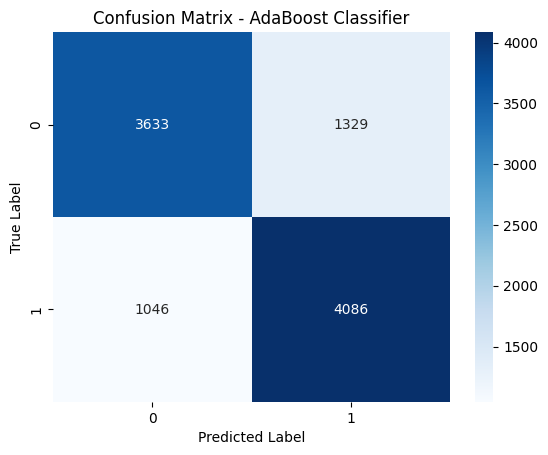

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize the AdaBoostClassifier with Logistic Regression as the base estimator
adaboost_model = AdaBoostClassifier(base_estimator=LogisticRegression(max_iter=500, random_state=42),
                                    n_estimators=50, random_state=42)

adaboost_model.fit(x_train, y_train)

y_pred_adaboost = adaboost_model.predict(x_test)

accuracy_adaboost = accuracy_score(y_test, y_pred_adaboost)
recall_adaboost = recall_score(y_test, y_pred_adaboost)
f1_adaboost = f1_score(y_test, y_pred_adaboost)
conf_matrix_adaboost = confusion_matrix(y_test, y_pred_adaboost)

print("\nAdaBoost Classifier Metrics:")
print("Accuracy:", accuracy_adaboost)
print("Recall:", recall_adaboost)
print("F1 Score:", f1_adaboost)

# Plot the confusion matrix for AdaBoost
sns.heatmap(conf_matrix_adaboost, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - AdaBoost Classifier")
plt.show()